<a href="https://colab.research.google.com/github/PrinceRaj1161/Plant-disease/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting Datasets

In [ ]:
!pip install -q kaggle

In [1]:
# To insert kaggle.json file
from google.colab import files
files.upload()

{}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                            Car Price Dataset                                   135KB  2025-01-26 19:53:28          14505        223  1.0              
vinothkannaece/sales-dataset                                        sales dataset                                        27KB  2025-02-18 05:13:42           1536         22  1.0              
adilshamim8/sleep-cycle-and-productivity                            Sleep Cycle & Productivity                          155KB  2025-02-07 05:44:59           2184         41  1.0              
abdulmalik1518/mobiles-dataset-2025     

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:21<00:00, 138MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [ ]:
!kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [00:16<00:00, 226MB/s]
100% 2.70G/2.70G [00:16<00:00, 177MB/s]


In [ ]:
import zipfile
import os

dataset_path = "new-plant-diseases-dataset.zip"  # Change as per your dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/kaggle/working/")


## Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training image Preprocessing

In [ ]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/working/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image preprocessing

In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/working/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_dataset:
  print(x.shape)
  print(y.shape)
  break

(32, 128, 128, 3)
(32, 38)


## Building Models

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compling Model

In [ ]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training


In [ ]:
model_accuracy = cnn.fit(training_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 164s 69ms/step - accuracy: 0.4272 - loss: 2.0258 - val_accuracy: 0.7959 - val_loss: 0.6648
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 187s 66ms/step - accuracy: 0.8470 - loss: 0.4849 - val_accuracy: 0.9076 - val_loss: 0.2849
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 62ms/step - accuracy: 0.9124 - loss: 0.2742 - val_accuracy: 0.9378 - val_loss: 0.1942
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 62ms/step - accuracy: 0.9396 - loss: 0.1857 - val_accuracy: 0.9287 - val_loss: 0.2211
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 62ms/step - accuracy: 0.9543 - loss: 0.1363 - val_accuracy: 0.9622 - val_loss: 0.1226
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.9655 - loss: 0.1054 - val_accuracy: 0.9486 - val_loss: 0.1604
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 66ms/step - accuracy: 0.9736 - loss: 0.0799 - val_accuracy: 0.9558 - val_loss: 0.1415
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 191s 61ms/step - accuracy: 

## Model Evaluation

### Model Evaluation in Training set

In [ ]:
train_loss, train_acc = cnn.evaluate(training_dataset)
print("Training Accuracy:", train_acc)
print("Training Loss:", train_loss)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.9951 - loss: 0.0146
Training Accuracy: 0.9958034157752991
Training Loss: 0.012735194526612759


### Model Evalution in Validation Set

In [ ]:
val_loss, val_acc = cnn.evaluate(validation_dataset)
print("Validation Accuracy:", val_acc)
print("Validation Loss:", val_loss)

550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9754 - loss: 0.0826
Validation Accuracy: 0.9734236001968384
Validation Loss: 0.08897297829389572


## Save model

In [ ]:
cnn.save("trained_model.h5")

In [ ]:
cnn.save("trained_model.keras")

In [ ]:
model_accuracy.history

{'accuracy': [0.6240273118019104,
  0.8677430748939514,
  0.9202361702919006,
  0.9426701664924622,
  0.9577352404594421,
  0.9664129614830017,
  0.973312497138977,
  0.9775517582893372,
  0.9806244969367981,
  0.9824169278144836],
 'loss': [1.2746891975402832,
  0.41720035672187805,
  0.24819694459438324,
  0.1760527640581131,
  0.12695138156414032,
  0.10418693721294403,
  0.07948616147041321,
  0.06913396716117859,
  0.05987533926963806,
  0.05570615828037262],
 'val_accuracy': [0.795868456363678,
  0.9075802564620972,
  0.937798798084259,
  0.9286933541297913,
  0.9622126221656799,
  0.9486114382743835,
  0.9557819366455078,
  0.9593102931976318,
  0.9645458459854126,
  0.9734236001968384],
 'val_loss': [0.6648010015487671,
  0.28488966822624207,
  0.19415996968746185,
  0.2211243063211441,
  0.12262461334466934,
  0.16041378676891327,
  0.14150473475456238,
  0.1435832381248474,
  0.12460263818502426,
  0.08897292613983154]}

## Recoding history

In [ ]:
import json
with open('model_accuracy.json', 'w') as f:
    json.dump(model_accuracy.history, f)

## Accuracy Visualization

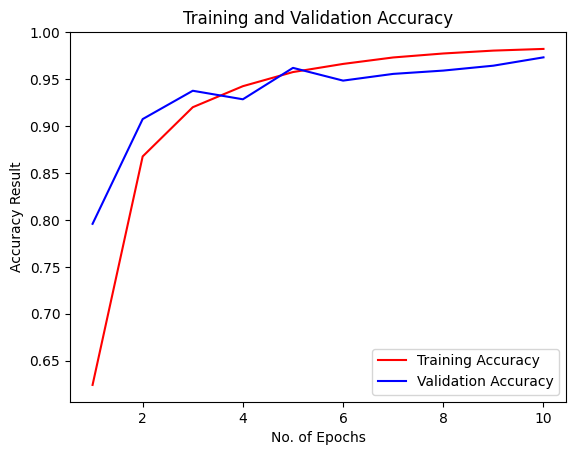

In [ ]:
epochs = list(range(1,11))
plt.plot(epochs, model_accuracy.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(epochs, model_accuracy.history['val_accuracy'], label='Validation Accuracy', color="blue")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Some other metrices

In [ ]:
class_name = validation_dataset.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/working/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_dataset)

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step


In [ ]:
y_pred.shape

(17572, 38)

In [ ]:
y_pred

array([[1.0000000e+00, 2.6567113e-11, 1.7104788e-12, ..., 2.8720484e-18,
        9.7066367e-19, 2.7849821e-17],
       [1.0000000e+00, 8.2985709e-11, 1.3488226e-12, ..., 2.3871633e-15,
        3.6345345e-16, 8.0948186e-16],
       [1.0000000e+00, 7.8395779e-15, 6.2873860e-14, ..., 1.7210296e-23,
        3.5772221e-21, 1.6616444e-17],
       ...,
       [5.9110568e-12, 1.9080393e-15, 5.4063309e-11, ..., 5.2845921e-14,
        1.6410740e-13, 1.0000000e+00],
       [1.6231659e-12, 6.9314466e-17, 1.3790587e-12, ..., 3.8503943e-14,
        1.2580337e-14, 1.0000000e+00],
       [2.1039004e-16, 3.4968680e-18, 4.3064299e-16, ..., 2.6705040e-19,
        7.5346164e-16, 1.0000000e+00]], dtype=float32)

In [ ]:
predicted_cat = tf.argmax(y_pred, axis=1)

In [ ]:
predicted_cat

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_cat = tf.concat([y for x,y in test_dataset], axis=0)
true_cat

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
y_true = tf.argmax(true_cat, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import classification_report
cm = tf.math.confusion_matrix(y_true, predicted_cat)
print(classification_report(y_true, predicted_cat, target_names= class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.97      0.95      0.96       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.91      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

## Confusion Matrix

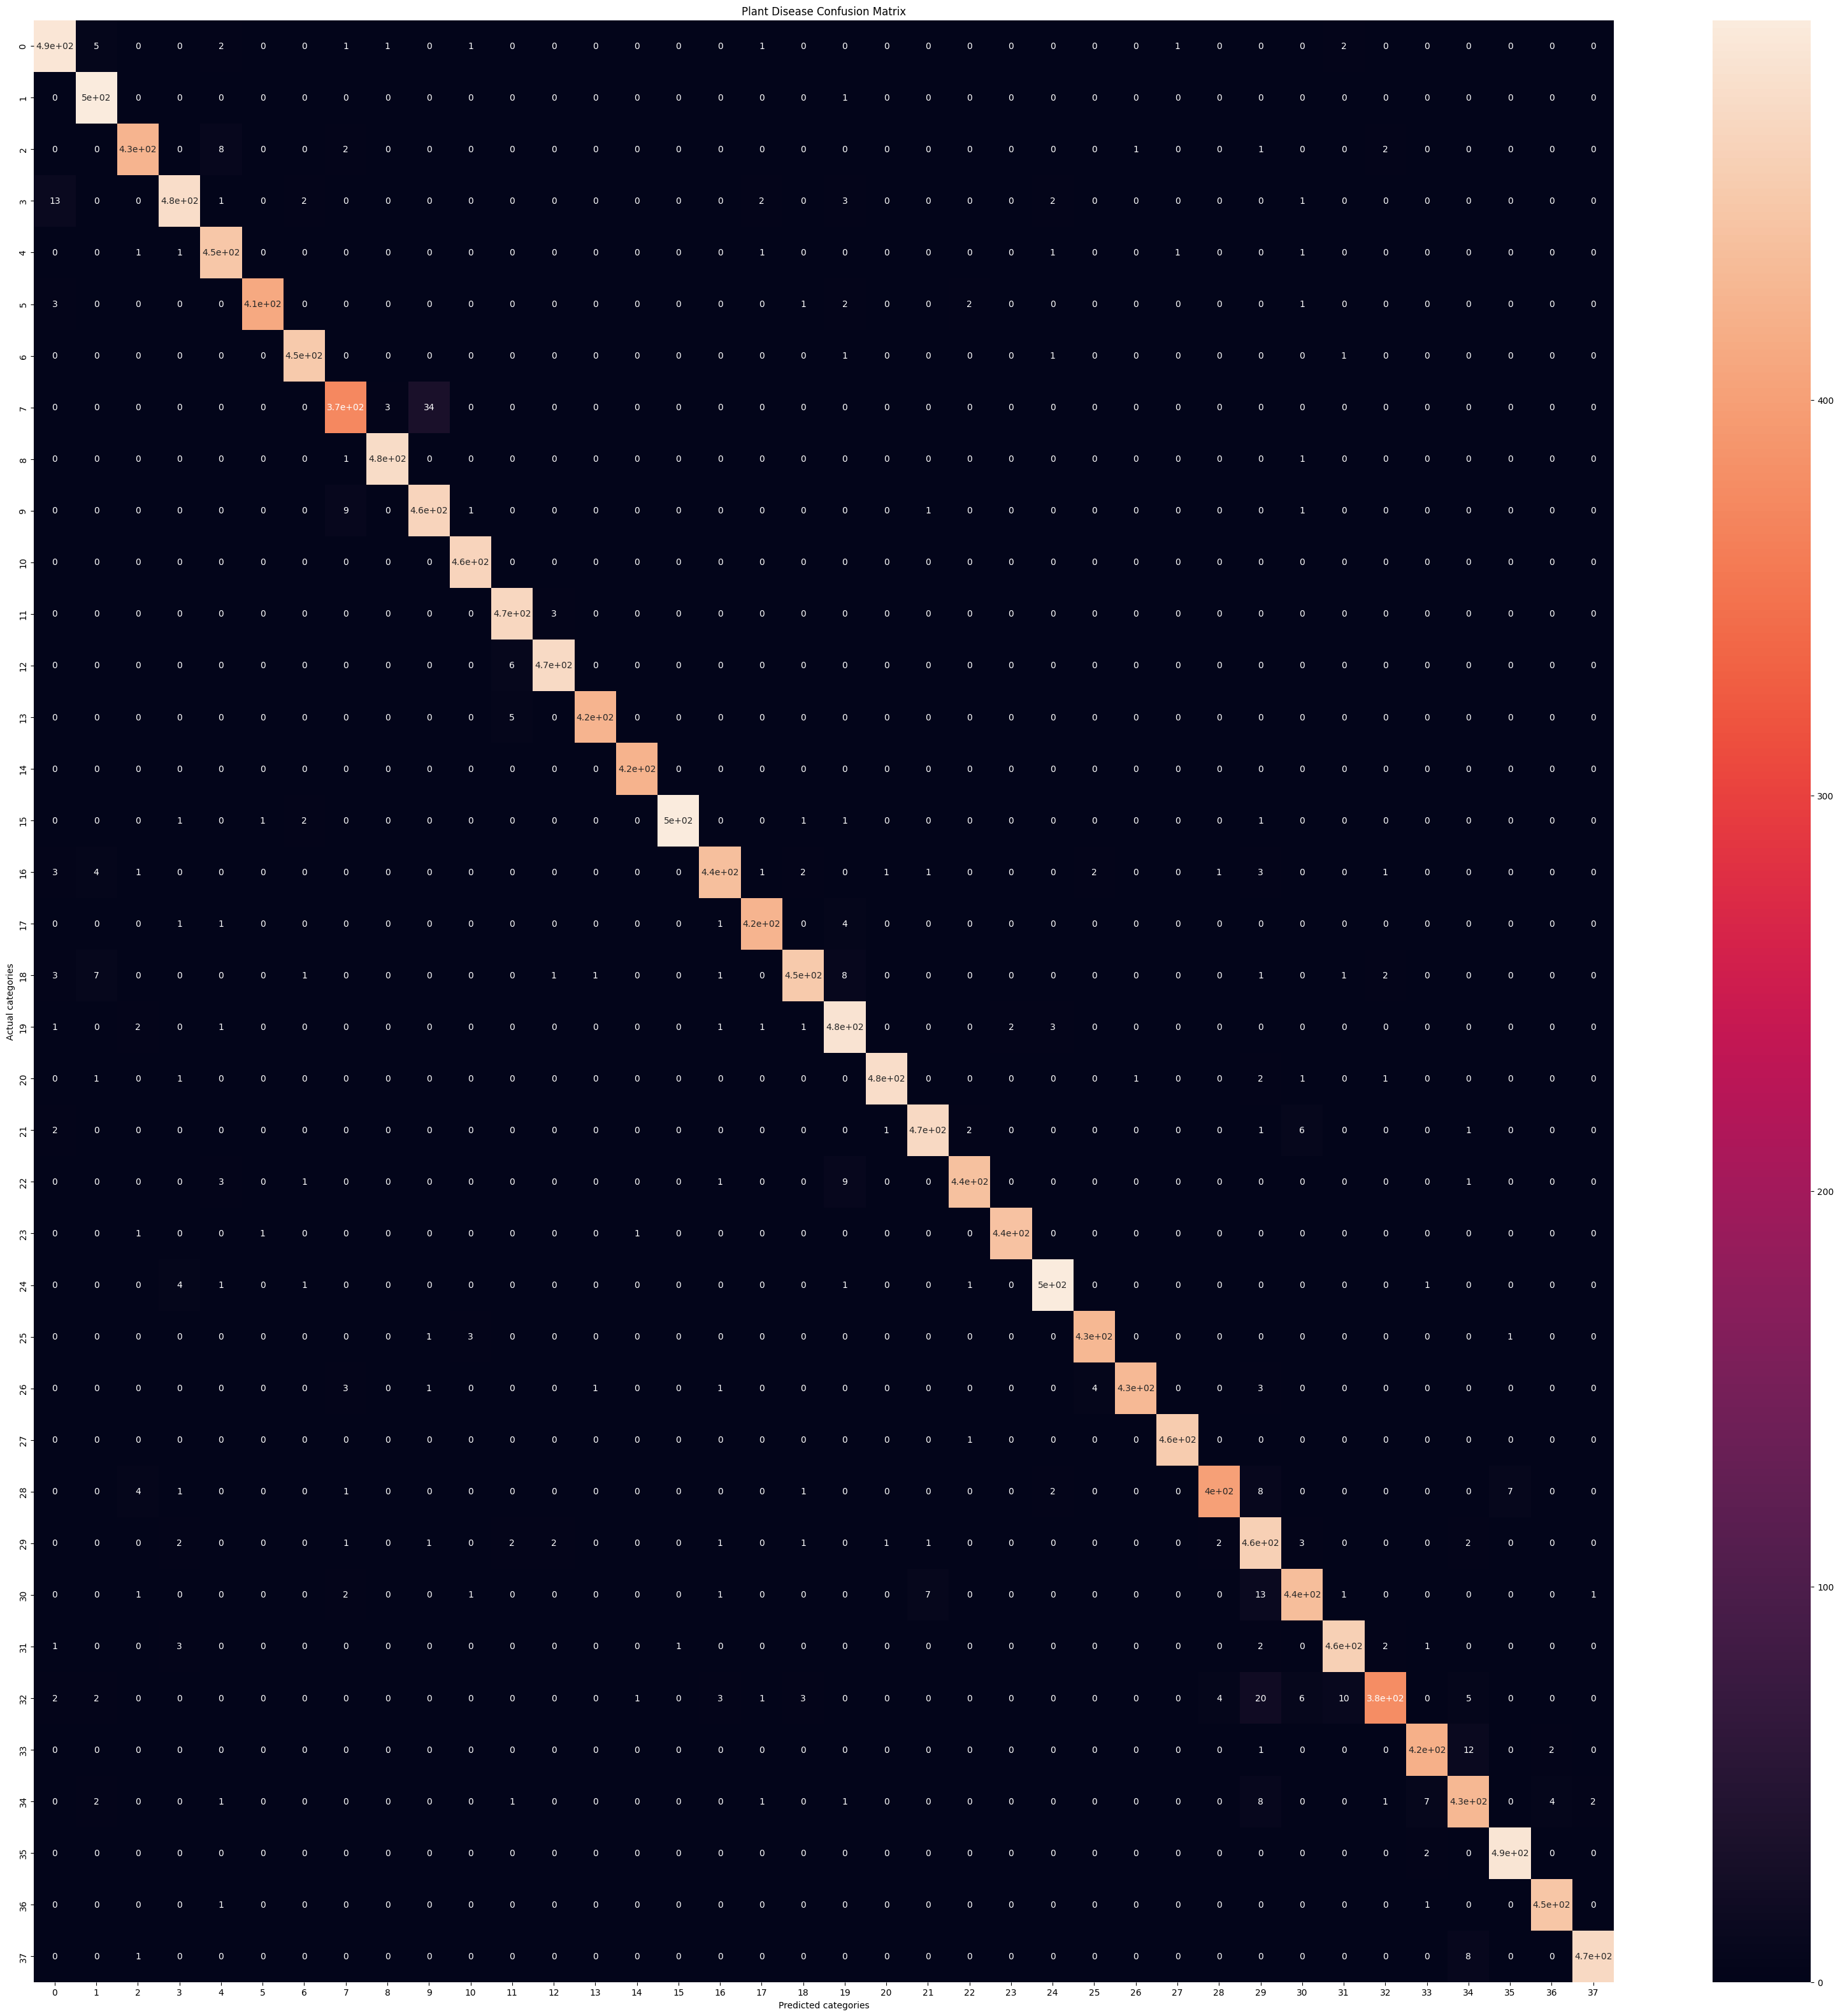

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

plt.xlabel("Predicted categories")
plt.ylabel("Actual categories")
plt.title("Plant Disease Confusion Matrix")
plt.show()